In [2]:
# import necessary libraries for data visualization/data analysis
import re
import pandas as pd
import numpy as np
import seaborn as sb
import io 
import pandas as pd
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

## High-Level Data Analysis (Part 1)

In [44]:
# open up test uncleansed data (47 iterations)
records = open("Test_Records", "r")

# display ONE "instance" (i.e. record) in example test data 
# our focus lies in extracting the TIMESTAMP and DATESTAMP information
print(records.read()[0:1713])

2019-06-11 DATESTAMP
05:36:38 TIMESTAMP
[[CashManagementExpInstructionMaintenanceAPI-1.0-DEVINT].http.requester.HTTP_Request_Configuration.worker(11)] DEBUG org.mule.module.http.internal.HttpMessageLogger - REQUESTER
HTTP/1.1 200 
Content-Length: 1415
Content-Type: application/json;charset=UTF-8
{
  "RecordsData": [
    {
      "accountNumber": "47434858",
      "originId": "",
      "cmRequestId": "10084",
      "transactionType": "ACHCD",
      "maintenanceIndicator": "",
      "instructionStatus": "Pending",
      "bankTransitABA": "053000196",
      "bankAccountHolder1": "THE HULK",
      "bankAccountHolder2": "HULKS WIFE",
      "custBankAccountNumber": "123456784",
      "checkingSavingIndicator": "C",
      "liveDate": "",
      "typeOfPayee": "A",
      "note1": "",
      "state": "",
      "countryCode": "",
      "city": "",
      "obiAccountNumber": "",
      "obiAccountName": "",
      "bankName": "BANK OF AMERICA, N.A.",
      "zipCode": "",
      "zipCodePlus4": "",
     

In [45]:
# find all TIMESTAMPS and generates a new file to store them
with open('Test_Records') as infile, open('times.txt', "w") as outfile:
    for line in infile:                          #Iterate Each line
        if not line.strip().split("TIMESTAMP")[-1]:      #Check for second Val
            line.strip().strip("TIMESTAMP")
            outfile.write(line)  

f = open('times.txt','r')
a = ['TIMESTAMP']
lst = []
for line in f:
    for word in a:
        if word in line:
            line = line.replace(word,'')
    lst.append(line)
f.close()
f = open('times.txt','w')
for line in lst:
    f.write(line)
with open("times.txt") as f:
    timestr = f.read().rstrip("\n")

# first timestamp entry in our string
print(timestr.split('\n', 1)[0])

05:36:38 


In [47]:
# converts TIMESTAMPS to 24 hour format, given "midnight" is considered the '0th hour' 
timeList = timestr.split()
int_values = []
decimal_times = []
for t in timeList:
    times = list(map(int, re.split(r"[:,]", t)))
    total_seconds = times[0]*3600 + times[1]*60 + times[2] 
    int_values.append(total_seconds)
    x= 3600
    decimal_times = np.divide(int_values, x)

# first timestamp entry converted from [H]H:MM:SS to H
print(decimal_times.tolist()[0])

5.610555555555556


In [48]:
# takes all DATESTAMPS and generates a new file comprised of them
with open('Test_Records') as infile, open('dates.txt', "w") as outfile:
    for line in infile:                          #Iterate Each line
        if not line.strip().split("DATESTAMP")[-1]:      #Check for second Val
            line.strip().strip("DATESTAMP")
            outfile.write(line)  

f = open('dates.txt','r')
a = ['DATESTAMP']
lst = []
for line in f:
    for word in a:
        if word in line:
            line = line.replace(word,'')
    lst.append(line)
f.close()
f = open('dates.txt','w')
for line in lst:
    f.write(line)
with open("dates.txt") as f:
    datestr = f.read().rstrip("\n")

# first datestamp entry in our string
print(datestr.split('\n', 1)[0])

2019-06-11 


In [49]:
dates = datestr.split()
print(dates)

['2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30', '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-20', '2019-07-21', '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-27']


In [74]:
data_stamps = pd.DataFrame(list(zip(dates, decimal_times)), columns =['Date', 'Time accessed']) 
data_stamps.head()

,Date,Time accessed
0,2019-06-11,5.610556
1,2019-06-12,5.696944
2,2019-06-13,5.807500
3,2019-06-14,5.818611
4,2019-06-15,5.828056


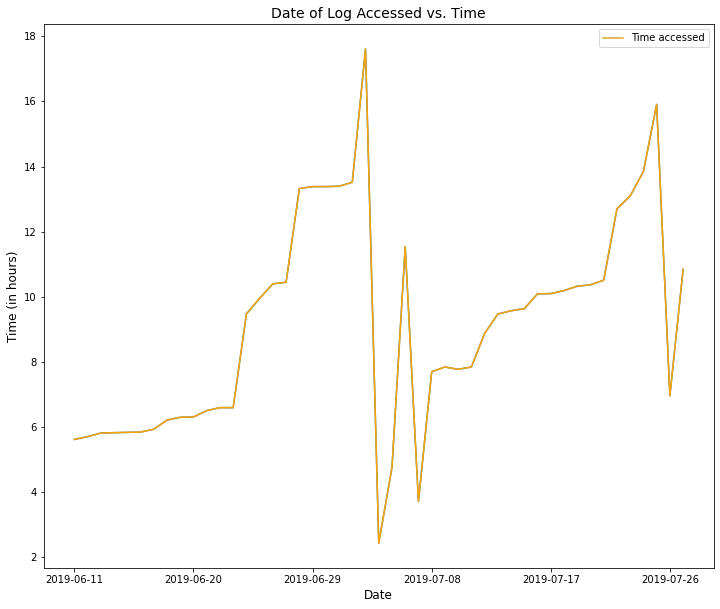

In [75]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12, 10)) # Change the size as necessary

ax=f.gca()
data_stamps.plot(ax=f.gca()) # figure.gca means "get current axis"
plt.title('Date of Log Accessed vs. Time', color='black', fontsize = 14)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Time (in hours)', fontsize=12) 

leg = ax.get_legend()
leg.legendHandles[0].set_color('goldenrod')

y = np.array(decimal_times)
x = np.arange(y.shape[0])
my_xticks = np.array(dates)
frequency = 9
plt.plot(x, y, color = 'orange')
plt.xticks(x[::frequency], my_xticks[::frequency])
plt.show()




In [73]:
# ask user for a range of times as to what they constitute malicious activity
# output list of those times that are out of the user's range
# output list of those corresponding dates whose times are out of the user's range
positionList = []
sus_times = []

low_input = input("Please enter the low end (in hours) of what constitutes malicious activity: ")
low_number = int(low_input)

high_input = input ("Please enter the high end (in hours) of what constitutes malicious activity: ")
high_number = int(high_input)

for i in [i for i, x in enumerate(decimal_times) if x <= low_number or x >= high_number]:
    positionList.append(i)

for x in decimal_times:
    if x <= low_number or x >= high_number:
        sus_times.append(x)

sus_dates = [dates[i] for i in positionList]

at_risk = pd.DataFrame(list(zip(sus_dates, sus_times)), columns =['High Risk Dates', 'Time Accessed']) 
at_risk.head()


Please enter the low end (in hours) of what constitutes malicious activity: 6
Please enter the high end (in hours) of what constitutes malicious activity: 14


,High Risk Dates,Time Accessed
0,2019-06-11,5.610556
1,2019-06-12,5.696944
2,2019-06-13,5.807500
3,2019-06-14,5.818611
4,2019-06-15,5.828056


## Involving Scikit-learn (Part 2)

In [86]:
data = pd.read_csv('2019_Dates.csv')
data.head()

,Date,Time accessed
0,6/11/2019,17.193464
1,6/12/2019,14.987176
2,6/13/2019,15.224832
3,6/14/2019,15.628141
4,6/15/2019,15.865967


In [78]:
my_timelist = data["Time accessed"].tolist()
my_datelist = data["Date"].tolist()

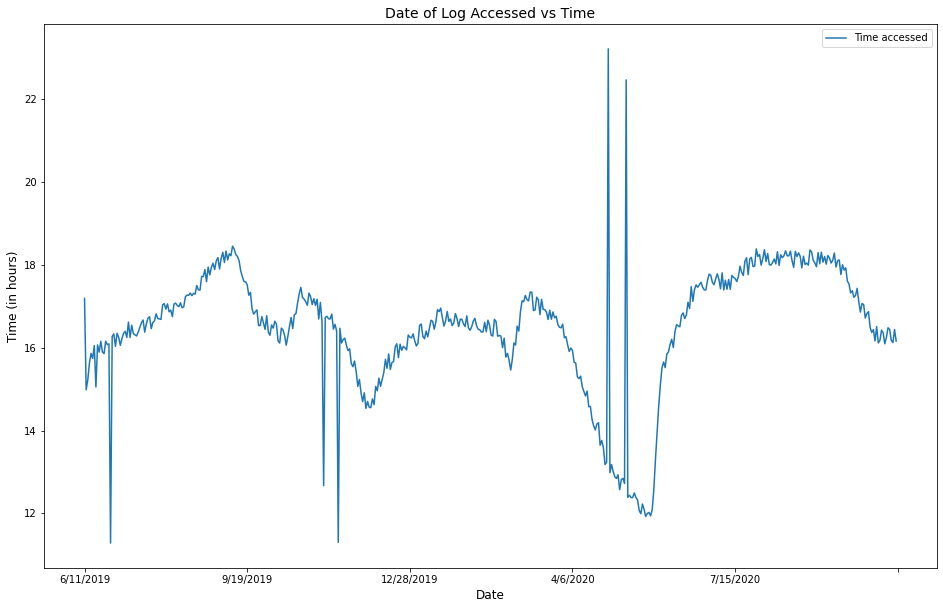

In [79]:
data.set_index('Date').plot(figsize=(16, 10))

plt.title('Date of Log Accessed vs Time', color='black', fontsize = 14)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Time (in hours)', fontsize=12) 

plt.show()

In [80]:
# create our traiing and validation sets for data anlysis
from sklearn.model_selection import train_test_split

X = data['Time accessed'].values.reshape((len(data), 1))
y = data['Time accessed'].values.reshape((len(data), 1))

X = X[:-1, :]
y = y[1:, :]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((449, 1), (449, 1), (50, 1), (50, 1))

In [81]:
X[1, :], y[0, :]

(array([14.9871764]), array([14.9871764]))

In [82]:
n_timesteps = 1
n_samples = X_train.shape[0]
n_features = X_train.shape[1]
n_val_samples = X_val.shape[0]

In [83]:
X_train_list = [np.expand_dims(X_train[i-n_timesteps:i, :], axis=0) for i in range(n_timesteps, n_samples + 1)]
X_train = np.concatenate(X_train_list, axis=0)
y_train = y_train[n_timesteps-1:, :]

X_val_list = [np.expand_dims(X_val[i-n_timesteps:i, :], axis=0) for i in range(n_timesteps, n_val_samples + 1)]
X_val = np.concatenate(X_val_list, axis=0)
y_val = y_val[n_timesteps-1:, :]

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((449, 1, 1), (449, 1), (50, 1, 1), (50, 1))

In [98]:
# create encoder
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import Dropout, Dense, Input, LSTM
from tensorflow.keras.optimizers import Adam


def Autoencoder(n_timesteps, n_features):
    i = Input(shape=(n_timesteps, n_features))
    
    x = LSTM(50, return_sequences=True)(i)
    x = Dropout(0.4)(x)
    
    x = LSTM(50)(x)
    x = Dropout(0.4)(x)

    x = Dense(n_features, kernel_initializer='he_normal')(x)
    x = Activation('linear')(x)

    model = Model(inputs=i, outputs=x)
    opt = Adam(lr=0.01)
    model.compile(loss='mean_absolute_error', optimizer=opt)
    
    return model

In [99]:
model = Autoencoder(n_timesteps, n_features)

In [100]:
# increase dataset we can validate on more samples and increase accuracy/anomaly detection capabilities
model = Autoencoder(n_timesteps, n_features)
history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=10, verbose=1,
                    callbacks=None, validation_data=(X_val, y_val), shuffle=False)

Epoch 1/10
4/4 [==============================] - 1s 261ms/step - loss: 16.0269 - val_loss: 14.9852
Epoch 2/10
4/4 [==============================] - 0s 14ms/step - loss: 14.0531 - val_loss: 11.8606
Epoch 3/10
4/4 [==============================] - 0s 12ms/step - loss: 10.6197 - val_loss: 8.1447
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 7.0897 - val_loss: 4.9931
Epoch 5/10
4/4 [==============================] - 0s 13ms/step - loss: 4.2782 - val_loss: 2.8476
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 2.5469 - val_loss: 1.5136
Epoch 7/10
4/4 [==============================] - 0s 12ms/step - loss: 1.9873 - val_loss: 1.3243
Epoch 8/10
4/4 [==============================] - 0s 12ms/step - loss: 2.1121 - val_loss: 1.5440
Epoch 9/10
4/4 [==============================] - 0s 13ms/step - loss: 2.1170 - val_loss: 1.4917
Epoch 10/10
4/4 [==============================] - 0s 11ms/step - loss: 2.1098 - val_loss: 1.3139


In [101]:
y_train_pred = model.predict(X_train)
y_train_pred.shape

(449, 1)

In [102]:
# now have a list of prediction errors from the training data created
# confirm our suspicions
from sklearn.metrics import mean_absolute_error
errors = [mean_absolute_error(y_train[i, :], y_train_pred[i, :]) for i in range(y_train_pred.shape[0])]
len(errors)

449

<AxesSubplot:ylabel='Density'>

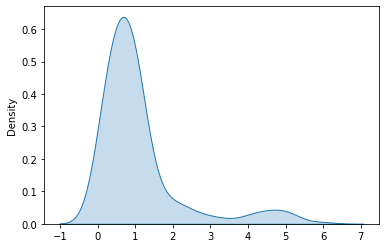

In [103]:
# make note of the fact that errors are skewed to the right (i.e. tail is to the right)
# there exists the presence of heavy outliers (i.e. 'wales')
sb.kdeplot(errors, shade=True)

In [123]:
# fit above graph of erros to a normal distrubution
from scipy.stats import norm
params = norm.fit(errors)
dist = norm(loc=params[0], scale=params[1])

dist.mean(), dist.std()

(1.1000843020295534, 1.156075121225983)

In [124]:
# deciding how much a point needs to be an outlier in order to be called "anomalous"
# what is considered anomalous is dependent on the user's dataset
def is_anomaly(error, mean, std, threshold):
    delta = np.abs(error - mean)
    multiple = delta / std
    if multiple < threshold:
        return 0
    else:
        return 1

In [125]:
# this is our validation data
import numpy as np
np.array(X_val).tolist()
print([float(i) for i in X_val])

[18.1148581, 17.71988583, 16.69019378, 14.56544223, 16.42330421, 18.02911606, 16.40806829, 17.05966813, 23.21887969, 15.89730463, 16.814969100000003, 15.706418300000001, 13.96242234, 16.09856052, 17.27109024, 18.17492066, 18.06967293, 16.3446652, 17.02699262, 16.17850643, 16.52398955, 16.72496007, 16.25293924, 17.72473229, 17.27524372, 18.25268282, 16.78918339, 16.87240884, 17.76051462, 17.29735091, 18.21293791, 17.95111781, 17.046241199999997, 15.22483236, 12.72323361, 18.04401983, 16.21903305, 15.07040419, 18.20319093, 16.69063684, 15.94037273, 18.2947891, 16.38163118, 14.1914381, 17.19346441, 15.90163171, 22.471438100000004, 14.53748231, 18.15804784, 15.51293733]


In [126]:
# running validation data through our encoder to "score" each value over 50 samples
# [0:51] because 51 is not inclusive
y_val_pred = model.predict(X_val[0:51, :, :])
val_errors = [mean_absolute_error(y_val[i, :], y_val_pred[i, :]) for i in range(y_val_pred.shape[0])]
result = [is_anomaly(x, dist.mean(), dist.std(), 2) for x in val_errors]
print(result)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]


In [127]:
indices = [i for i, x in enumerate(result) if x == 1]
print(indices)

[6, 8, 34, 43, 46]


In [129]:
val_times = []
for i in X_val:
    val_times.append(float(i[0]))
print(val_times) 

[18.1148581, 17.71988583, 16.69019378, 14.56544223, 16.42330421, 18.02911606, 16.40806829, 17.05966813, 23.21887969, 15.89730463, 16.814969100000003, 15.706418300000001, 13.96242234, 16.09856052, 17.27109024, 18.17492066, 18.06967293, 16.3446652, 17.02699262, 16.17850643, 16.52398955, 16.72496007, 16.25293924, 17.72473229, 17.27524372, 18.25268282, 16.78918339, 16.87240884, 17.76051462, 17.29735091, 18.21293791, 17.95111781, 17.046241199999997, 15.22483236, 12.72323361, 18.04401983, 16.21903305, 15.07040419, 18.20319093, 16.69063684, 15.94037273, 18.2947891, 16.38163118, 14.1914381, 17.19346441, 15.90163171, 22.471438100000004, 14.53748231, 18.15804784, 15.51293733]


In [130]:
mal_times = [val_times[i] for i in indices]
print(mal_times)

[16.40806829, 23.21887969, 12.72323361, 14.1914381, 22.471438100000004]


In [131]:
rounded_listx = [round(elem, 4) for elem in my_timelist ]

In [132]:
rounded_listy = [round(elem, 4) for elem in mal_times]
print(rounded_listy)

[16.4081, 23.2189, 12.7232, 14.1914, 22.4714]


In [133]:
newpositionList = []
for i in [i for i,x in enumerate(my_timelist) if x in mal_times]:
    newpositionList.append(i)
print(newpositionList)

[155, 316, 322, 332, 333]


In [134]:
mal_decimals = [my_timelist[i] for i in newpositionList]
print(mal_decimals)

[16.40806829, 14.1914381, 23.21887969, 12.72323361, 22.471438100000004]


In [135]:
mal_dates = [my_datelist[i] for i in newpositionList]
print(mal_dates)

['11/13/2019', '4/22/2020', '4/28/2020', '5/8/2020', '5/9/2020']


In [136]:
# High Risk Dates and Times based on our 2019 data
pd.DataFrame(list(zip(mal_dates, mal_decimals)), columns =['High Risk Dates', 'Time Accessed']) 

,High Risk Dates,Time Accessed
0,11/13/2019,16.408068
1,4/22/2020,14.191438
2,4/28/2020,23.218880
3,5/8/2020,12.723234
4,5/9/2020,22.471438


In [137]:
def anomaly_score(error, dist):
    delta = np.abs(error - dist.mean())
    return dist.cdf(dist.mean() + delta)

In [143]:
# this bit of code tells us how likely our sample of 50 values is to be anomalous. 
# The higher the value the more likely that individual element in the "validation data" is anomalous
mal_scores = [np.round(anomaly_score(x, dist), 4) for x in val_errors]
print(mal_scores)

[0.5085, 0.6276, 0.7059, 0.904, 0.6484, 0.5192, 1.0, 0.8101, 0.9962, 0.532, 0.7574, 0.6987, 0.8993, 0.6032, 0.7884, 0.6666, 0.5201, 0.585, 0.7925, 0.6233, 0.6158, 0.7275, 0.6419, 0.6813, 0.8056, 0.5202, 0.8152, 0.6435, 0.6087, 0.7447, 0.5868, 0.6687, 0.8244, 0.6468, 0.9999, 0.6277, 0.6156, 0.7638, 0.5102, 0.7561, 0.5099, 0.5198, 0.644, 0.9817, 0.8243, 0.5699, 0.9993, 0.8799, 0.514, 0.6374]


In [144]:
anomalies = [mal_scores[i] for i in indices]
print(anomalies)

[1.0, 0.9962, 0.9999, 0.9817, 0.9993]


In [145]:
# put it all together
anomalies_df = pd.DataFrame(list(zip(mal_dates, mal_decimals, anomalies)), columns = ['High Risk Date', 'Time Accessed', 'Anomaly Value']) 
anomalies_df 

,High Risk Date,Time Accessed,Anomaly Value
0,11/13/2019,16.408068,1.0000
1,4/22/2020,14.191438,0.9962
2,4/28/2020,23.218880,0.9999
3,5/8/2020,12.723234,0.9817
4,5/9/2020,22.471438,0.9993
